# Coursework. Block 1
*Pandas и Matplotlib*

**NB!** The code must have comments for each logical code block. Otherwise the work **will not** be accepted. <br><br>
Completion of the coursework may require the use of additional libraries. 

<br><br>
**Work description:**

You have a business task to prepare an analytical report based on the available data, which will help producers of educational programs to effectively build a strategy for modernizing and improving courses. At the beginning of the report you are asked to prepare a concise descriptive block for each course based on the calculated indicators. The next step is to calculate the potential teaching load to assess the need for staff expansion. This is followed by a two-paragraph block on analyzing the quality of course content to identify problematic modules that may need improvement. There is also a task to identify potential seasonality. Finally, an assignment is proposed to independently develop a metric of student performance to find those who are doing significantly worse in the course. Each of the analysis items is intended to be accompanied by an analytical conclusion based on the calculated metrics.

<br><br>

_________
Designations:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – The assignment can be completed after completing the modules on Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – The assignment can be completed after completing the modules on Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – optional advanced assignment
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Description and initial work with data

You need to prepare the data and describe it. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Combine the datasets (except `students.scv`) into one common dataset for further work. Create a separate dataset to calculate the average age of students in the courses (a separate dataset with `students.scv` is needed to avoid losing values in the main dataset because not all students have questionnaire data on date of birth). <br> <br>
Describe the data: <br>
1. **(p)** Calculate:
      * the total number of courses in the dataset, 
      * the number of modules in each course, 
      * the number of lessons in each module on each course, 
      * the median number of lessons per module per course, 
      * the number of students on each course
      * minimum, maximum, average, median age of students
      * minimum, maximum, average, median age of students on each course
2. **(m)** Build a bar-chart reflecting the number of students in each course. Ticks should be unfolded so that they are readable
3. **(m)** Build a horizontal (columns should be horizontal) bar-chart showing the number of students on each course. The chart should have a title. The values should be sorted. The colour of the bars should contain information about the area to which the course belongs (i.e. a legend is needed). Transparency should stand at 0.1. A median line should be drawn on the chart. The median line should have its own colour. The graph should not have a frame ⭐
4.     Based on the calculated values, describe the data (the description should be complete and cover all the metrics obtained above)

_____________________________________________________________________


To check that you have correctly merged all datasets into the main dataset (without `students.csv`), run a similar query to the one below. The output should match. Note that some column names have been renamed.

In [1]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# importing all data into df
progress_phases = pd.read_csv('progress_phases.csv', sep = ',', parse_dates=['start_date' ,'finish_date'])
progresses = pd.read_csv('progresses.csv', sep = ',')
course_contents = pd.read_csv('course_contents.csv', sep = ',')
courses = pd.read_csv('courses.csv', sep = ',')
students = pd.read_csv('students.csv', sep = ',', parse_dates=['birthday'], dayfirst = False)

# merge df into the main array
m1 = progress_phases.merge(progresses, left_on='progress_id', right_on='id', how='left')
m2 = m1.merge(courses, left_on='course_id', right_on = 'id', how='left')
main = m2.merge(course_contents, on=['course_id', 'module_number', 'lesson_number'], how = 'left')

In [2]:
# total number of courses in the dataset
main.course_id.unique().shape[0]

15

In [3]:
# the number of modules on each course. 
n_modules = main.groupby(['course_id','title'])['module_number'].agg('nunique').reset_index()
# see which courses are the longest and shortest based on the number of modules. May be useful later
n_modules.sort_values(by='module_number')

,course_id,title,module_number
7,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,8
11,ccbab00e99b27f83369d6cc89d914ad6,PHP-разработчик с 0 до PRO. Часть 1,8
6,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,9
8,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,9
5,842218e7c983795934bbe4533c0888c8,SMM-маркетолог от А до Я,11
1,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,17
2,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,17
4,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,17
10,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,17
9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,18


In [4]:
# number of lessons in each module on each course,
n_lessons = main.groupby(['course_id','title','module_number'])['lesson_number'].agg('nunique').reset_index()
# sort by number of lessons to identify possible interesting observations.
n_lessons.sort_values(by='lesson_number')
# median number of lessons per module in each course
n_lessons.groupby(['course_id','title'])['lesson_number'].agg('median').reset_index().sort_values(by='lesson_number', ascending=False)


,course_id,title,lesson_number
6,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,13.0
4,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,7.0
7,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,7.0
14,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,7.0
9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,6.5
5,842218e7c983795934bbe4533c0888c8,SMM-маркетолог от А до Я,6.0
1,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,5.0
8,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,5.0
10,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,5.0
11,ccbab00e99b27f83369d6cc89d914ad6,PHP-разработчик с 0 до PRO. Часть 1,4.0


In [5]:
# the number of students on each course
n_students = main.groupby(['course_id','title'])['student_id'].agg('nunique').reset_index()
# descriptive statistics and top by number of students
n_students.describe() 
n_students.sort_values(by='student_id', ascending=False)

,course_id,title,student_id
9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,2168
13,e3a0df907589d56692b5cb561fd90d87,Веб-дизайн с нуля 2.0,2014
7,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,2004
10,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,1711
12,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,1151
14,e9bb9205eeed307ee7cbaa08bfd166c3,JavaScript с нуля,966
11,ccbab00e99b27f83369d6cc89d914ad6,PHP-разработчик с 0 до PRO. Часть 1,854
8,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,782
4,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,763
1,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,685


In [6]:
# minimum, maximum, average, median age of students
# firstly load the data with birthdays and convert them to timestamps
students = pd.read_csv('students.csv', sep = ',')
students['birthday'] = pd.to_datetime(students['birthday'], errors = 'coerce')
# Get the age from the date of birth
today = pd.datetime.today()
students['age'] = students['birthday'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
# delete rows with date of birth > current date to get rid of negative age (obviously incorrect entry of birthd
students.drop(students[students.birthday > today].index, inplace=True)
# calculate the minimum, maximum, average, median age of students
students_age = students['age'].agg(['min', 'max', 'mean', 'median'])
students_age

<ipython-input-6-40959f0430ff>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime.today()


min         1.000000
max       137.000000
mean       30.494644
median     30.000000
Name: age, dtype: float64

In [7]:
# minimum, maximum, average, median age of students in each course
# add age to the main df at the beginning
main = main.merge(students, how='left', left_on = 'student_id', right_on = 'id')
# group by courses and calculate minimum, maximum, average, median age
age_students = main.groupby(['course_id','title'])['age'].agg(['min', 'max', 'mean', 'median']).reset_index()
age_students

,course_id,title,min,max,mean,median
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,2.0,52.0,31.036015,30.0
1,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,2.0,56.0,32.890400,33.0
2,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,17.0,52.0,29.859410,29.0
3,480d25ad36878fce09e7aada316ba1a6,Веб-разработчик,15.0,52.0,28.780254,28.0
4,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,7.0,66.0,30.851029,30.0
5,842218e7c983795934bbe4533c0888c8,SMM-маркетолог от А до Я,3.0,53.0,30.145945,30.0
6,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,7.0,56.0,31.204042,30.0
7,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,2.0,60.0,29.876928,29.0
8,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,3.0,62.0,34.466605,34.0
9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,3.0,101.0,32.584051,32.0


In [8]:
# sorted by median age
age_students.sort_values(by='median', ascending = False)

,course_id,title,min,max,mean,median
8,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,3.0,62.0,34.466605,34.0
1,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,2.0,56.0,32.890400,33.0
9,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,3.0,101.0,32.584051,32.0
11,ccbab00e99b27f83369d6cc89d914ad6,PHP-разработчик с 0 до PRO. Часть 1,2.0,76.0,32.330139,31.0
12,dad6f6ffc086caa89e2f40c28a9c7490,UX-дизайн,2.0,86.0,31.574787,31.0
0,04ba6d0b40670c43a209141fa01fa784,Анимация интерфейсов,2.0,52.0,31.036015,30.0
4,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,7.0,66.0,30.851029,30.0
5,842218e7c983795934bbe4533c0888c8,SMM-маркетолог от А до Я,3.0,53.0,30.145945,30.0
6,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,7.0,56.0,31.204042,30.0
2,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,17.0,52.0,29.859410,29.0


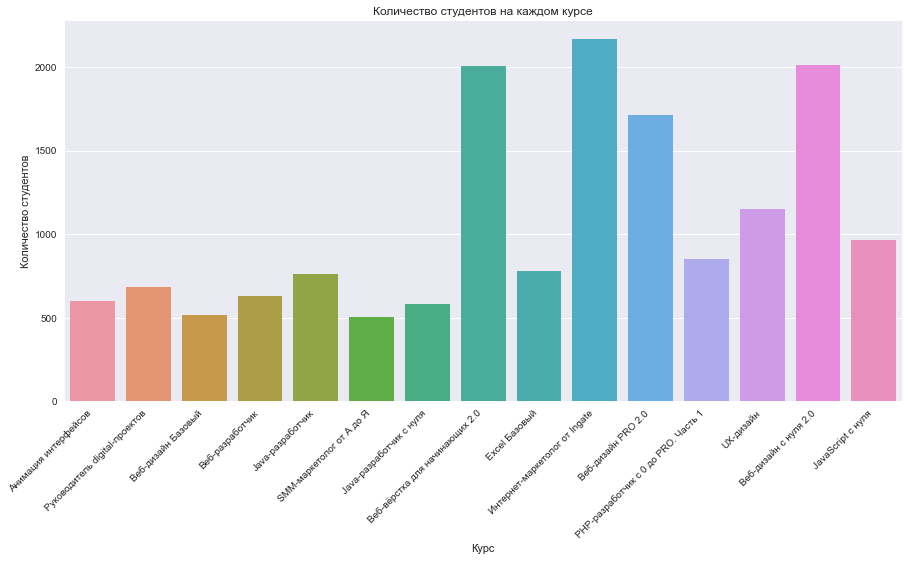

In [9]:
# Build a bar-chart reflecting the number of students in each course. Ticks need to be unfolded so that they are readable
data = n_students
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(data=data, x='title', y='student_id', ax=ax, ci=None, hue='title', dodge=False)
g.set_title('Количество студентов на каждом курсе')
g.set_xlabel('Курс')
g.set_ylabel('Количество студентов')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, ha = 'right')
g.legend_.remove()
plt.show()

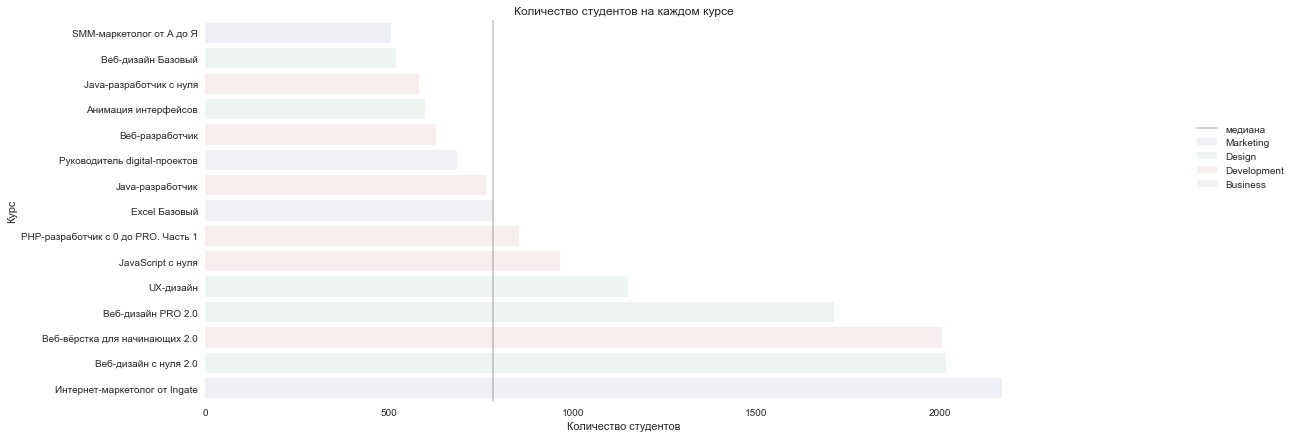

In [17]:
from numpy import median
# add course sphere data and sort it
data = n_students.merge(courses[['id', 'field']], how='left', left_on = 'course_id', right_on = 'id').sort_values(by = 'student_id')
# build a horizontal bar-chart showing the number of students in each course
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(data=data, y='title', x='student_id', ax=ax, ci=None, hue='field', alpha=0.1, dodge=False)
g.set_title('Количество студентов на каждом курсе')
g.set_ylabel('Курс')
g.set_xlabel('Количество студентов')
g.set_yticklabels(g.get_yticklabels(), ha = 'right')
plt.axvline(n_students['student_id'].median(), alpha=0.2, color = 'black', label='медиана')
g.legend(bbox_to_anchor=(1.3, 0.75))
plt.box(on=False)
plt.show()

The programme consists of 15 courses. The number of modules within the courses varies from 8 to 21, with an average of 15. Each module contains from 1 to 29 lessons. The longest in terms of the number of lessons within modules is the course "Internet Marketer from Ingate": 3 out of 4 modules in the top are related to this course. The number of students on the courses ranges from 506 to 2168. At the same time, of the 15 courses, the top 3 most popular have over 2000 students: "Internet Marketer from Ingate", "Web Design from scratch 2.0", "Web Development for Beginners 2.0". The remaining courses have significantly fewer students: in 10 courses the number of students is less than 1000, the median value is 782 and noticeably less than the average (1062), which indicates an uneven distribution of students across courses. The popularity of the above courses indicates that it is worthwhile to pay attention to them and perhaps direct development resources to them first. The minimum age of students, even after removing obviously incorrect birthdate data (later than the current date) is 1 (infant), the maximum 136 (person born in the 19th century) - both extreme values indicate that incorrect birthdates remain in the data and make us think about implementing checks on the correctness of birthdate creation by users.Despite this, the median and mean age values are close: 29 and 30 respectively, which allows a fairly reliable determination of the age of the target audience of students.
The distribution of students' age by courses is homogeneous - there are no strong deviations from the average age of all students, however, we can pay attention to courses with the minimum and maximum median/average age: 28 years old for the course "Web Design from scratch 2.0" and 34 for the course "Excel Basic". Younger students choose one of the most popular courses, probably expecting to get in on the trend in the market for digital professions, while more mature students are looking to improve their skills in classic Excel in order to be more effective in any workplace, as Excel is used everywhere.

## 2. Calculation of potential teaching load

1. **(p)** Calculate the student growth in each course in each month in each history (each month ranging from March 2016 to July 2019 inclusive). Calculate the student's course start date by the date of the first homework start date.
2. **(m)** Based on the first item, construct a line-graph with student growth in each month for each course. 15 graphs. Graphs should have headings, axes should be signed. Ticks should be unfolded so that they are legible.
3. **(m)** Based on the first item, construct a line-graph with multiple lines showing student growth in each month for each course. 15 lines on the graph. Ticks should be unfolded so that they are legible. The graph should have a heading. The axis reflecting the growth should be signed. The line for each course should have a different colour (a legend is needed). The graph should not have a frame ⭐
4. **(p)** Calculate the number of homework progressions in each month throughout history (each month ranging from March 2016 to July 2019 inclusive) for each course. Take into account that homework assignments may flow from one month to another (such homework assignments should be included in the total number of progressions for all months covered by the due date of these assignments)
5. **(m)** Construct a line-graph for the fourth item. 15 graphs. Graphs should have titles, axes should be signed. Ticks should be expanded so that they are legible
6. **(m)** Construct one line-graph for all courses on the fourth paragraph. 15 lines on the line-graph. Ticks need to be unfolded so that they are readable. The graph should have a title. The axis representing the number of progressions should be signed. The line for each course should have a different colour (a legend is needed). The graph should not have a frame ⭐
7. Based on the calculated values, make an analytical conclusion (should be complete and cover all metrics obtained above)

In [11]:
## YOUR CODE HERE ###
# 2.1. Calculate the student growth in each course in each month for the entire history (each month ranging from March 2016 to July 2019 inclusive). Calculate the student's course start date by the date the first homework started.
# Since we need monthly data on the number of students, let's add a column with the month and year "start_date" to the main df
main['year'] = main['start_date'].apply(lambda x: x.year)
main['month'] = main['start_date'].apply(lambda x: x.month)
# select lessons with only HWs and find the first module in each course in which HWs occur
first_mod = main[main['is_homework']==True].groupby('title')['module_number'].agg('min').reset_index()
# сохраним номера модулей с первым ДЗ для каждого курса в словарь
d_mod = dict(first_mod.values)

# to check that the HW is the first in the course, we add a column with the number of the module with the first HW to the main df
main_st_count_1 = main[main['is_homework']==True]
main_st_count_1['first_hw_mod_n'] = main_st_count_1.title.map(d_mod)
# calculate the number of students for each course and module with the first DL by month
main_st_count_1 = main_st_count_1[main_st_count_1['module_number']==main_st_count_1['first_hw_mod_n']].groupby(
    ['title', 'year', 'month','student_id'])['start_date'].first().reset_index()
main_st_count_2 = main_st_count_1.groupby(['title', 'year', 'month'])['start_date','student_id'].agg(
    {'start_date':'min','student_id':'count'}).reset_index()
main_st_count_2

<ipython-input-11-184084c54166>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_st_count_1['first_hw_mod_n'] = main_st_count_1.title.map(d_mod)
<ipython-input-11-184084c54166>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_st_count_2 = main_st_count_1.groupby(['title', 'year', 'month'])['start_date','student_id'].agg(


,title,year,month,start_date,student_id
0,Excel Базовый,2018,2,2018-02-19 12:32:48.645567+00:00,6
1,Excel Базовый,2018,3,2018-03-16 09:21:41.863332+00:00,3
2,Excel Базовый,2018,5,2018-05-16 17:41:12.651640+00:00,3
3,Excel Базовый,2018,6,2018-06-07 13:01:39.384992+00:00,9
4,Excel Базовый,2018,7,2018-07-01 14:17:21.284885+00:00,13
...,...,...,...,...,...
239,Руководитель digital-проектов,2019,3,2019-03-01 13:05:29.830782+00:00,36
240,Руководитель digital-проектов,2019,4,2019-04-02 18:42:29.446802+00:00,17
241,Руководитель digital-проектов,2019,5,2019-05-02 11:29:14.466574+00:00,25
242,Руководитель digital-проектов,2019,6,2019-06-04 13:49:20.621592+00:00,15


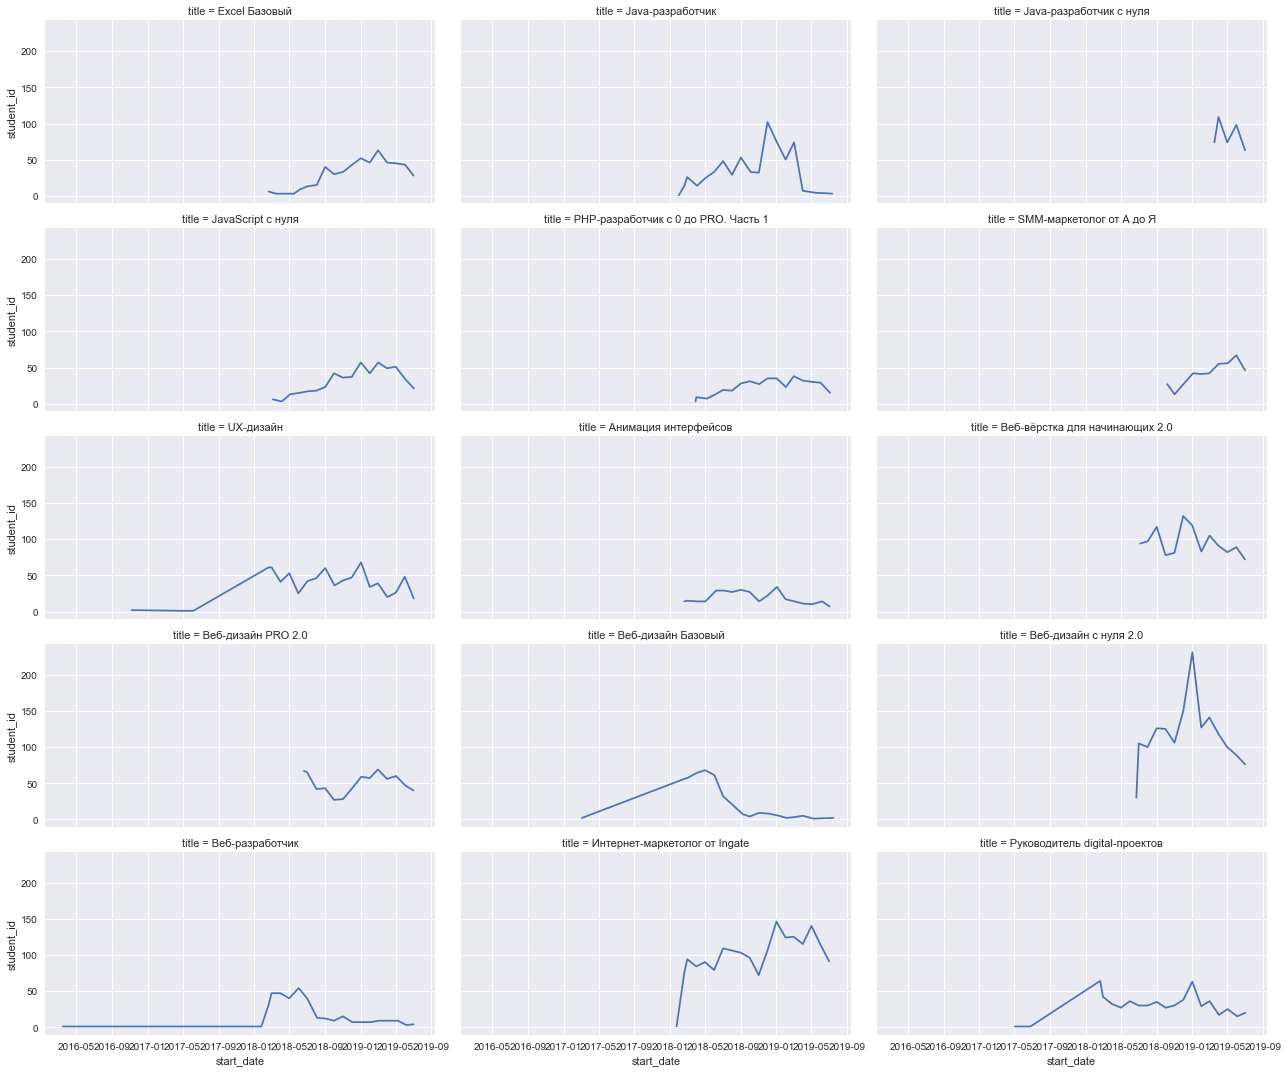

In [12]:
# 2. build a line-graph with student growth in each month for each course. 15 graphs. Graphs should have headings, axes should be signed. Ticks should be unfolded so that they are readable.
g = sns.FacetGrid(main_st_count_2, col='title', height=3, aspect=2, col_wrap=3)
g.map(sns.lineplot, 'start_date', 'student_id')

plt.show()

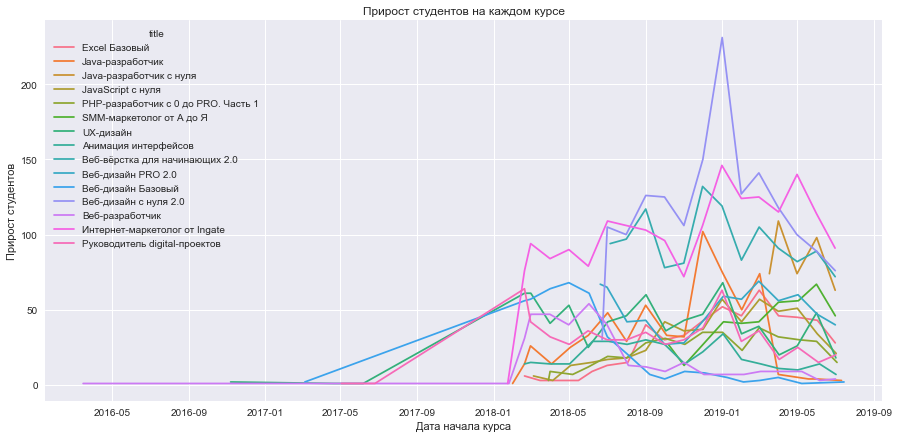

In [13]:
# 3. build a line-graph with several lines reflecting the growth of students in each month for each course. 15 lines on the graph. Ticks need to be unfolded so that they are readable. The graph should have a title. The axis reflecting growth should be signed. The line for each course should have a different colour (a legend is needed). The graph should not have any frames ⭐
fig, ax = plt.subplots(figsize=(15,7))

g = sns.lineplot(data=main_st_count_2, y='student_id', x='start_date', ax=ax, ci=None, hue='title')
g.set_title('Прирост студентов на каждом курсе')
g.set_ylabel('Прирост студентов')
g.set_xlabel('Дата начала курса')
plt.show()

In [14]:
# 4. Calculate the number of homework progressions in each month for the entire history (each month between March 2016 and July 2019 inclusive) for each course. Take into account that homework assignments can flow from one month to another (such df should be included in the total number of progressions for all months covered by the due date of these df)
# create a df with only completed homework data 
main_2_4 = main[(main['is_homework']==True) & (main['status']=='done')]

# add a column with the difference between the start and end dates of TORs in months 
main_2_4['prd_to_fill'] = main_2_4.apply(
    lambda x: pd.period_range(start=x.start_date, end=x.finish_date, freq='M'), axis = 1)
# The obtained lists of months between the start and end dates of HW fulfilment will be split/copied into cells to account for them
main_2_4 = main_2_4.explode('prd_to_fill')
# group the data 
main_2_4 = main_2_4.groupby(['title', 'prd_to_fill'])['progress_id', 'start_date'].agg(
    {'progress_id':'count', 'start_date':'max'}).reset_index()
# second variant with pivot table  main_2_4.pivot_table('progress_id', 'prd_to_fill', 'title', aggfunc=pd.Series.nunique, fill_value=0)
main_2_4

<ipython-input-14-7b9d2be650a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_2_4['prd_to_fill'] = main_2_4.apply(
<ipython-input-14-7b9d2be650a3>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_2_4 = main_2_4.groupby(['title', 'prd_to_fill'])['progress_id', 'start_date'].agg(


,title,prd_to_fill,progress_id,start_date
0,Excel Базовый,2018-02,35,2018-02-26 14:23:43.898457+00:00
1,Excel Базовый,2018-03,6,2018-03-28 11:01:14.130225+00:00
2,Excel Базовый,2018-04,12,2018-04-16 20:58:56.867042+00:00
3,Excel Базовый,2018-05,17,2018-05-30 08:57:43.587259+00:00
4,Excel Базовый,2018-06,34,2018-06-30 23:31:35.072467+00:00
...,...,...,...,...
253,Руководитель digital-проектов,2019-03,348,2019-03-31 14:11:26.757810+00:00
254,Руководитель digital-проектов,2019-04,264,2019-04-30 16:27:53.364299+00:00
255,Руководитель digital-проектов,2019-05,256,2019-05-31 18:26:22.986287+00:00
256,Руководитель digital-проектов,2019-06,172,2019-06-30 18:18:12.128448+00:00


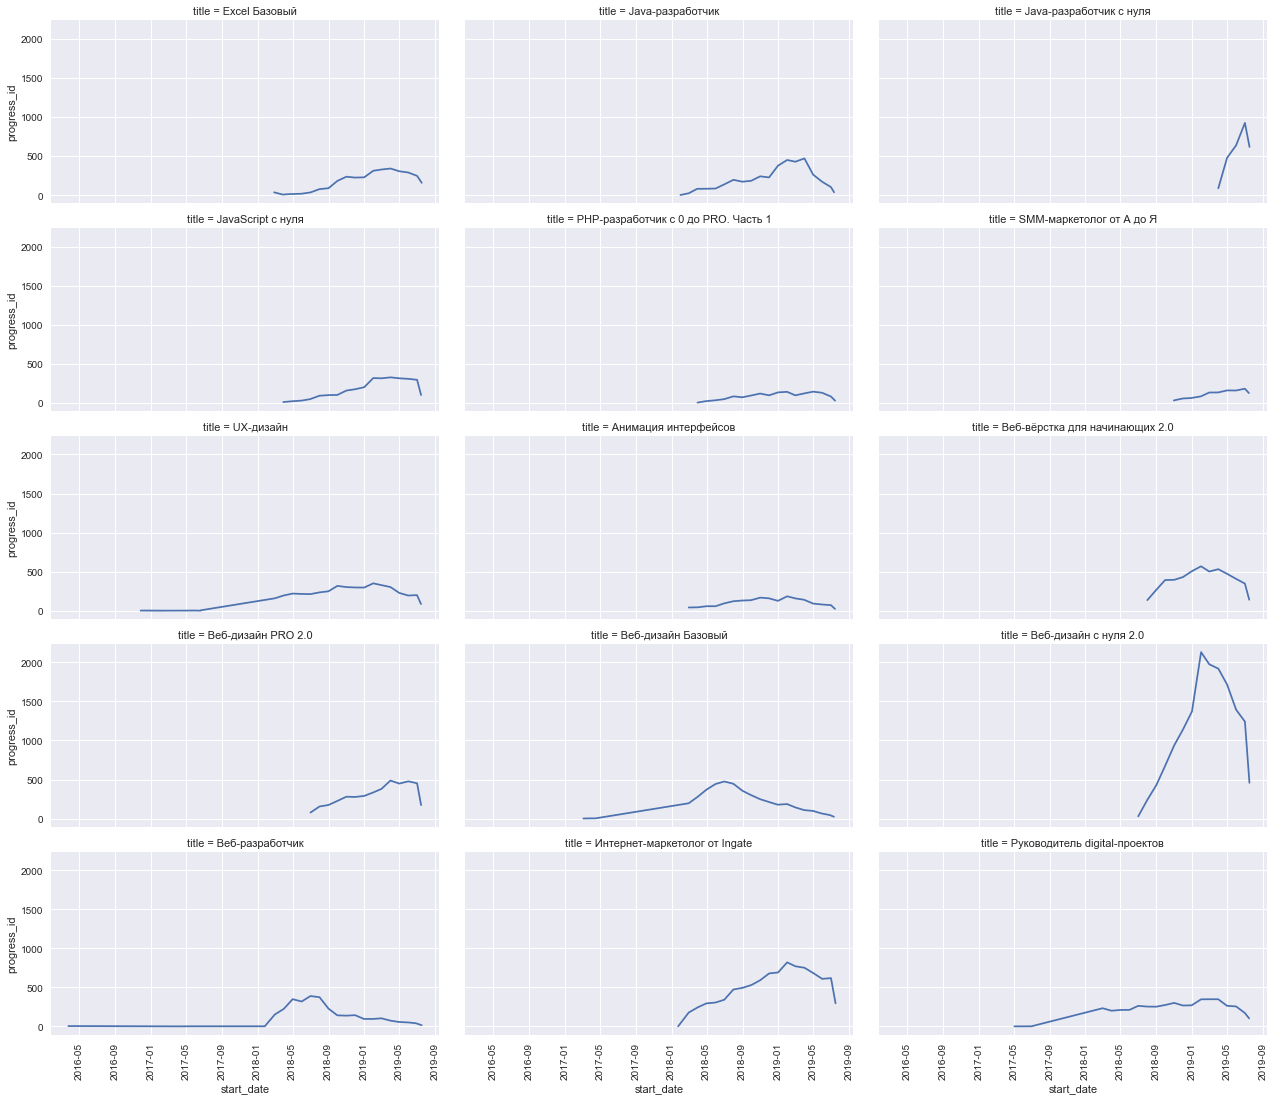

In [15]:
# 2.5 Construct a line-graph for the fourth item. 15 graphs. Graphs should have titles, axes should be signed. Ticks should be unfolded so that they are readable

g = sns.FacetGrid(main_2_4, col='title', height=3, aspect=2, col_wrap=3)
g.map(sns.lineplot, 'start_date', 'progress_id')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

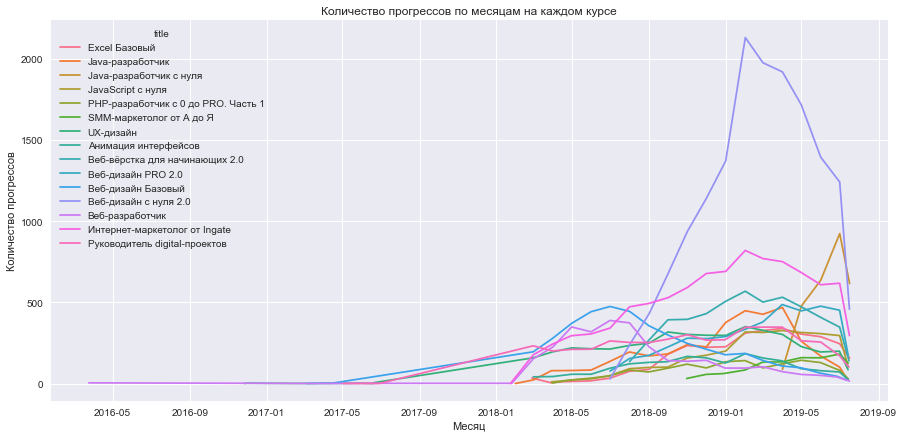

In [16]:
# 2.6 Construct one line-graph for all courses in the fourth paragraph. 15 lines on the graph. Ticks need to be unfolded so that they are readable. The graph should have a title. The axis representing the number of progressions should be signed. The line for each course should have a different colour (a legend is needed). The graph should not have any frames ⭐
fig, ax = plt.subplots(figsize=(15,7))

g = sns.lineplot(data=main_2_4, y='progress_id', x='start_date', ax=ax, ci=None, hue='title')
g.set_title('Количество прогрессов по месяцам на каждом курсе')
g.set_ylabel('Количество прогрессов')
g.set_xlabel('Месяц')
plt.show()

**2.7**

**Conclusions on teaching load based on growth data:**

Firstly, let's divide the courses according to the number of relatively stable student growth: courses where the growth fluctuated around 50 people/month and below, and courses with growth of 100 people/month and above. Out of 15, 4 courses can be referred to as popular fast-growing courses: Internet Marketer from Ingate, Web Development for Beginners 2.0, Web Design from scratch 2.0 and Java Developer from scratch. These are the leading courses in terms of student growth, so the teaching load may be heavy and constantly growing at a high rate compared to other courses. It may be worthwhile to provide additional faculty in these areas. As an alternative to hiring new instructors and as a cost-saving measure, two of the above courses (Web Design from scratch 2.0 and Java Developer from scratch) could be reassigned instructors from other versions of these courses where growth is declining or virtually non-existent (Web Design Basic and Java Developer). For the courses with low growth rates (+/- 50), it can be noted that there is a trend of decreasing student growth in 2019 (popularity of the courses is decreasing).

**Conclusions on instructor workload based on the number of progressions:**

The top 4 courses by maximum number of progressions (Over 500 progressions per month) repeat the growth leaders: Internet Marketer from Ingate, Web Development for Beginners 2.0, Web Design from scratch 2.0 and Java Developer from scratch. This further confirms the increased workload in these courses based on growth data. All other courses were below the 500 progressions per month mark throughout.
Looking a little more closely at the top 4 courses by workload, we can see that the duration and intensity of the workload varied among them:
- the increased load on teachers on the course Web Design from scratch 2.0 was the longest (almost 2 years over 500) and the most intensive (over 1500 progresses per month for half a year).
- the same long, but less intensive (on average 600 - 700 progresses) was the load on the course Internet Marketer from Ingate.
- on the other 2 courses (Web development for beginners 2.0 and Java developer from scratch) the load of over 500 per month was observed for a very short period of time 2-3 months

In order to further refine how much the workload over 500 progresses and over 100 increments was high, additional teacher data is needed: for example, the number of assignments checked by teachers and the average time per assignment checked. 

**Common for both gains and progressions:** The last 3 months (2019-05 - 2019-07) have seen a decline in both figures for all courses, which can be a worrying indicator for producers. 

## 3. Identification of problematic modules

1. **(p)** Calculate the minimum, maximum, mean, median time to complete each module (the difference between the start time and end time of homework) for each course. If there is more than one homework assignment in a module, calculate the difference between the start time of the first homework assignment and the end time of the last homework assignment in the module
2. **(m)** Based on the first item, construct a line-graph with the median time to complete each module for each course. 15 graphs. The graphs should have headings
3. **(p)** To identify seasonality, calculate the median homework time by month (12 months, January-December) for each course. 
4. **(m)** Based on the third item, construct a line-graph plotting the lines for each course with the median homework time by month. 15 lines on the graph. The graph should have a title. The axis representing the passing time must be signed. The line for each course should have a different colour (a legend is needed). The graph should not have any frames ⭐
5. Based on the calculated values, make an analytical conclusion (should be complete and cover all metrics obtained above)

In [17]:
### YOUR CODE HERE ###
# 3.1 Calculate the minimum, maximum, mean, median time for each module
# create 2 df's with the first and last date of each student in each module.
main_3_1s = main[main['is_homework']==True].groupby(['title', 'module_number', 'student_id'])['start_date'].min().reset_index()
main_3_1f = main[main['is_homework']==True].groupby(['title', 'module_number', 'student_id'])['finish_date'].max().reset_index()
# merge them and remove incorrect data where the end date is less than or equal to the start date.
main_3_1j = main_3_1s.merge(main_3_1f, on=['title', 'module_number', 'student_id'], how='left').dropna()
main_3_1j = main_3_1j.drop(main_3_1j[(
    main_3_1j['finish_date'] < main_3_1j['start_date']) | (main_3_1j['finish_date'] == main_3_1j['start_date'])].index)
# calculate the difference in days and convert it to a number rounded to 2 digits
main_3_1j['days_spent'] = main_3_1j['finish_date'] - main_3_1j['start_date']
main_3_1j['days_spent'] = main_3_1j['days_spent'].agg(lambda x: round(x / np.timedelta64(1, 'D'), 2))
# count min, max, avg, med.
main_3_1 = main_3_1j.groupby(['title', 'module_number'])['days_spent'].agg(['min', 'max', 'mean', 'median'])
main_3_1

min     max       mean  median
title                         module_number                                 
Excel Базовый                 1              0.04  183.75   6.044427   2.335
                              2              0.04  184.27   4.348980   1.875
                              3              0.02   89.13   3.449164   1.510
                              4              0.07  327.55  11.036522   3.250
                              5              0.06  175.55   7.454586   3.085
...                                           ...     ...        ...     ...
Руководитель digital-проектов 12             0.00  211.57  23.095802   7.930
                              13             0.00  246.84  28.996290  13.800
                              14             0.00  199.14  16.437193   8.890
                              15             0.00  132.21   7.439474   2.840
                              16             0.00  355.63  20.688039   7.140

[190 rows x 4 columns]

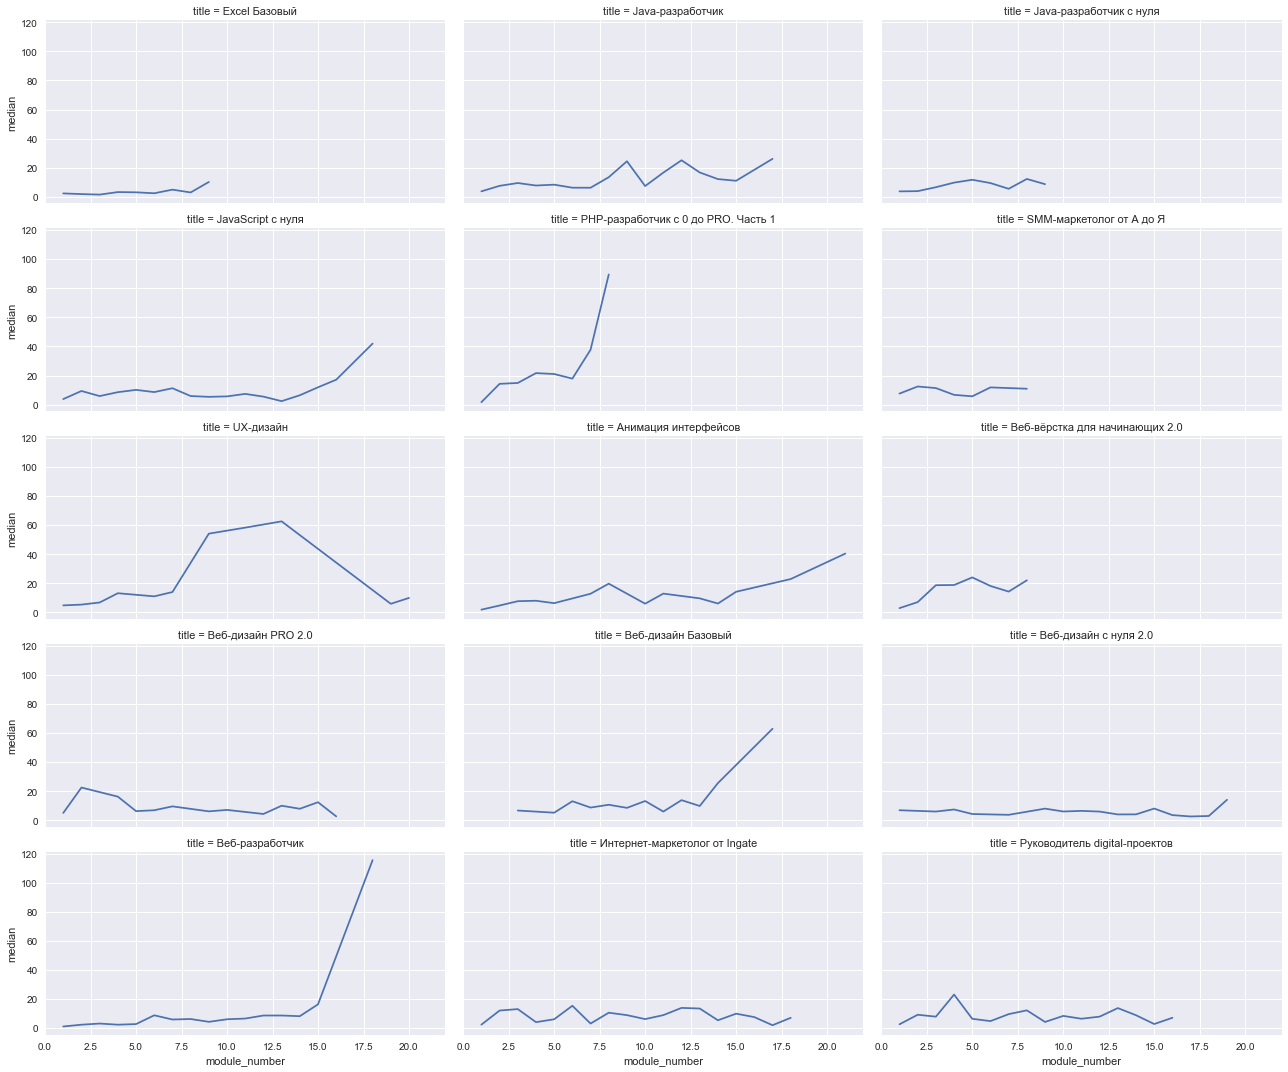

In [18]:
g = sns.FacetGrid(main_3_1.reset_index(), col='title', height=3, aspect=2, col_wrap=3)
g.map(sns.lineplot, 'module_number', 'median')

plt.show()

In [19]:
# 3.3 median homework completion time by month (12 months, January-December) for each course.
# add month and year by end date to the main array, take only completed homework and clean the data as in 3.2.2
main['year'] = main['finish_date'].apply(lambda x: x.year)
main['month'] = main['finish_date'].apply(lambda x: x.month)
main_3_3 = main[(main['is_homework']==True) & (main['status']=='done')]
main_3_3.drop(main_3_3[(
    main_3_3['finish_date'] < main_3_3['start_date']) | (main_3_3['finish_date'] == main_3_3['start_date'])].index)
# calculate the delta in days and the median of the exchange rates
main_3_3['delta'] = (main_3_3['finish_date'] - main_3_3['start_date']) / np.timedelta64(1, 'D')
main_3_3.groupby(['title', 'month'], as_index=False)['delta'].median()

<ipython-input-19-f69445d3e7a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_3_3['delta'] = (main_3_3['finish_date'] - main_3_3['start_date']) / np.timedelta64(1, 'D')


,title,month,delta
0,Excel Базовый,1.0,2.099530
1,Excel Базовый,2.0,2.240738
2,Excel Базовый,3.0,2.828454
3,Excel Базовый,4.0,1.883787
4,Excel Базовый,5.0,2.580251
...,...,...,...
166,Руководитель digital-проектов,8.0,12.747989
167,Руководитель digital-проектов,9.0,10.272937
168,Руководитель digital-проектов,10.0,5.913221
169,Руководитель digital-проектов,11.0,5.768993


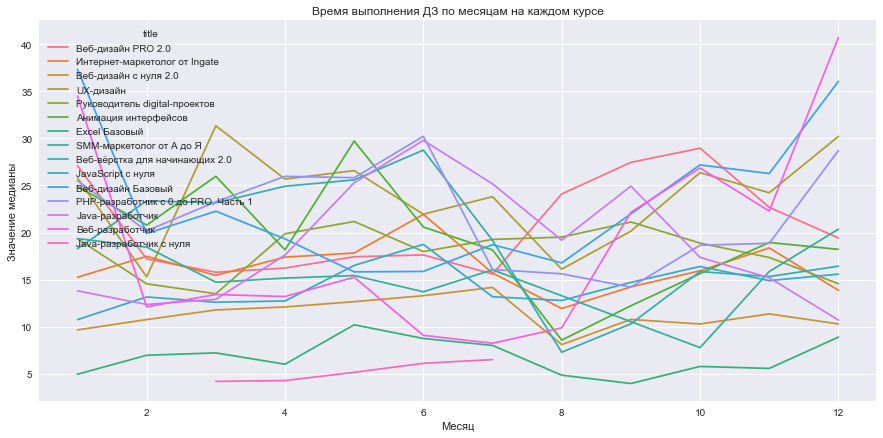

In [20]:
# 3.4 build a line-graph plotting the lines for each course with the median homework time by month.
fig, ax = plt.subplots(figsize=(15,7))

g = sns.lineplot(data=main_3_3, y='delta', x='month', ax=ax, ci=None, hue='title')
g.set_title('Время выполнения ДЗ по месяцам на каждом курсе')
g.set_ylabel('Значение медианы')
g.set_xlabel('Месяц')
plt.show()

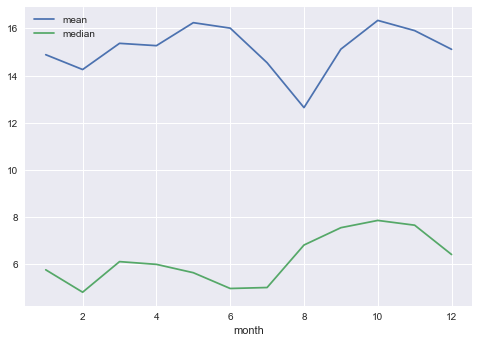

In [21]:
# plot the mean and median to make it clearer
main_3_3.groupby('month')['delta'].agg(['mean', 'median']).plot()

### **3.5**

Based on the data on the duration of assignments by module, all courses can be divided into 2 groups:
- Courses in which duration (=complexity) increases as you get closer to the end, such as Web Developer, Web Design Basic, Interface Animation and PHP Developer from 0 to PRO. Part 1. This seems logical because towards the end of the courses there are more extensive ejsams and coursework. Perhaps you should pay attention to those where the performance lengthens in times very quickly (in the last 2-3 modules: Web Developer and PHP-developer from 0 to PRO. Part 1. Such a sharp jump can demotivate students and may indicate that the previously completed modules have not fully prepared the student for "combat" tasks.
- courses with uniform duration of assignments. The majority of such courses, which is good, because when a student enters a stable rhythm and does not encounter many times more difficult tasks than those he/she has done before, he/she gets more satisfaction and motivation from studying.

It is necessary to note separately the module UX-design, where the duration of the performance of tasks sharply increases in the middle of the course and falls towards the end of it. It is out of all the courses. It may be worth regrouping the modules so that the learning progresses in increasing complexity, rather than demotivating students with difficult assignments in the first half of the course.

Seasonality

We can note 2 spikes in the deadlines for assignments for all courses: in May and in August-October. The first one is most likely related to the May holidays, and the second one - to the holiday period. 

## 4. Conversion calculation

1. **(p)** Calculate the conversion rate of students from one module to another in each course. Formula: the ratio of the number of students who started to do homework in this module (if there are several homework assignments in the module, count by the first homework assignment in the module) to the number of students who passed the assignment in the previous module (if there are several homework assignments in the module, count by the last homework assignment in the module).
2. **(m)** Construct a bar-chart showing the conversion rate of students moving from one module to another on each course. The bar-chart should have a title. Ticks should be expanded so that they are readable
3. **(m)** Construct a horizontal (columns should be horizontal) bar-chart showing the conversion rate of students moving from one module to another on each course. 15 graphs. Charts should have headings. Ticks should contain the module number and name. The colour of the bars of the charts should contain information about the area to which the course relates (a legend is needed). Transparency should be set to 0.1. A median conversion line for each course should be drawn on the charts. The median line should have its own colour. Charts should not have frames ⭐
4. Based on the calculated values, draw an analytical conclusion (should be complete and cover all metrics obtained above)

In [22]:
### YOUR CODE HERE ###
# create 2 frames with the required number of started/completed tasks in each module
main = main.sort_values(by=['title', 'module_number', 'lesson_number'])
main_4_1_s = main[(main['is_homework']==True)]
main_4_1_s = main_4_1_s.groupby(['title', 'module_number', 'module_title', 'lesson_number'], as_index=False)['student_id'].count()
main_4_1_s = main_4_1_s.groupby(['title', 'module_number','module_title'], as_index=False)['student_id'].first()
main_4_1_d = main[(main['is_homework']==True) & (main['status']=='done')]
main_4_1_d = main_4_1_d.groupby(['title', 'module_number', 'lesson_number'], as_index=False)['student_id'].count()
main_4_1_d = main_4_1_d.groupby(['title', 'module_number'], as_index=False)['student_id'].first()
# combine them into one frame, move them down one line and count them.
main_4_1 = main_4_1_s.merge(main_4_1_d, on=['title', 'module_number'], how='left')
main_4_1['student_id_y'] = main_4_1['student_id_y'].shift(1, fill_value=0) 
main_4_1 = main_4_1.drop(main_4_1[main_4_1['module_number']==1].index)
main_4_1['converse'] = main_4_1['student_id_x'] / main_4_1['student_id_y']
main_4_1

,title,module_number,module_title,student_id_x,student_id_y,converse
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,0.947598
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,0.980296
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,0.891473
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,0.983498
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0,0.974074
...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,98.0,0.969388
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,88.0,0.988636
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,69.0,1.028986
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64.0,1.031250


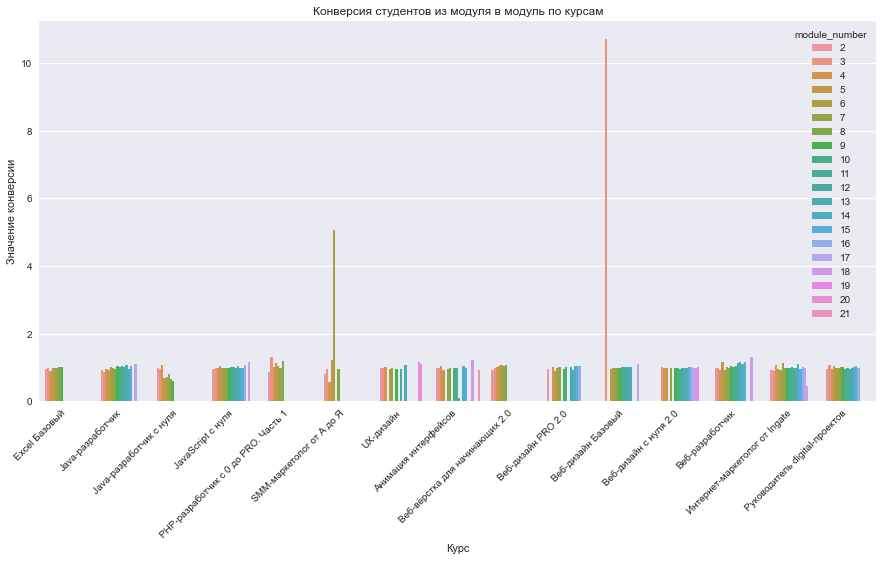

In [23]:
# 4.2
data = main_4_1
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(data=data, x='title', y='converse', ax=ax, ci=None, hue='module_number')
g.set_title('Конверсия студентов из модуля в модуль по курсам')
g.set_xlabel('Курс')
g.set_ylabel('Значение конверсии')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()


In [24]:
# 4_1. additional digital analytics
main_4_1.groupby(['title'])['converse'].agg(['median', 'mean', 'min', 'max'])
# 4_1. additional graphs for courses with gaps in conversion data 
# main_4_1_s[(main_4_1_s['title']=='UX-дизайн') | (main_4_1_s['title']=='Java-разработчик c нуля')]

,median,mean,min,max
title,,,,
Excel Базовый,0.981883,0.974661,0.891473,1.026882
Java-разработчик,1.011561,0.997445,0.875878,1.105263
Java-разработчик c нуля,0.766337,0.816986,0.607143,1.080000
JavaScript с нуля,1.000000,1.013623,0.950000,1.173913
PHP-разработчик с 0 до PRO. Часть 1,1.055556,1.079474,0.855305,1.307692
SMM-маркетолог от А до Я,0.958753,1.595499,0.564356,5.055556
UX-дизайн,0.989039,1.017690,0.957746,1.153846
Анимация интерфейсов,0.985915,0.933826,0.085714,1.210526
Веб-вёрстка для начинающих 2.0,1.033582,1.025724,0.925000,1.081250


In [25]:
# 4.3 add data on the course area, the colour corresponding to each area to be displayed on the chart and the column "Number+Module name".
d_field = dict(courses[['title', 'field']].values)
main_4_1['field'] = main_4_1.title.map(d_field)
main_4_1['color'] = main_4_1.field.map(dict(zip(list(main_4_1.field.unique()), ['red', 'green', 'blue', 'darkviolet']) ))
main_4_1['y_mod_name'] = main_4_1[['module_number','module_title']].values.tolist()
main_4_1['y_mod_name'] = main_4_1['y_mod_name'].apply(lambda x: str(x))
main_4_1

,title,module_number,module_title,student_id_x,student_id_y,converse,field,color,y_mod_name
1,Excel Базовый,2,Основной функционал Excel (продолжение),434,458.0,0.947598,Business,red,"[2, 'Основной функционал Excel (продолжение)']"
2,Excel Базовый,3,Формулы и функции Excel. Введение,398,406.0,0.980296,Business,red,"[3, 'Формулы и функции Excel. Введение']"
3,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,387.0,0.891473,Business,red,"[4, 'Формулы и функции Excel. Продолжаем работ..."
4,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,303.0,0.983498,Business,red,"[5, 'Формулы и функции Excel. Более сложные фо..."
5,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,270.0,0.974074,Business,red,"[6, 'Формулы и функции Excel. Работа с ошибкам..."
...,...,...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,12,Решение факапов. Lean/TOC. Обзор.,95,98.0,0.969388,Business,red,"[12, 'Решение факапов. Lean/TOC. Обзор.']"
187,Руководитель digital-проектов,13,Интеграционные проекты.,87,88.0,0.988636,Business,red,"[13, 'Интеграционные проекты.']"
188,Руководитель digital-проектов,14,Управление дизайнерами. Разработка дизайна по ...,71,69.0,1.028986,Business,red,"[14, 'Управление дизайнерами. Разработка дизай..."
189,Руководитель digital-проектов,15,Основы технической грамотности,66,64.0,1.031250,Business,red,"[15, 'Основы технической грамотности']"


<ipython-input-26-b61e42bde1f9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = main_4_1.sort_values(by=['title','module_number'], ascending = False)[main_4_1['title']==title]


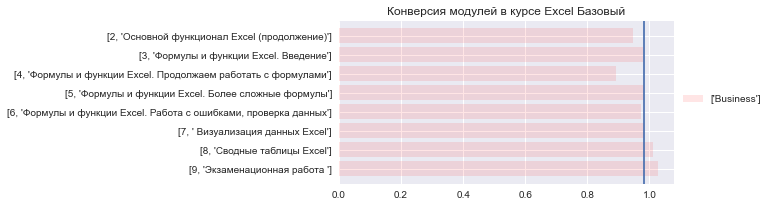

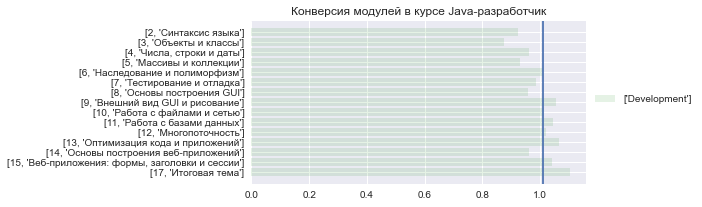

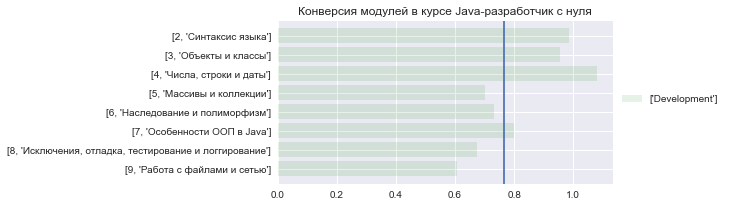

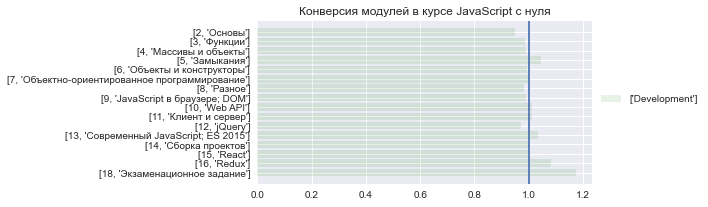

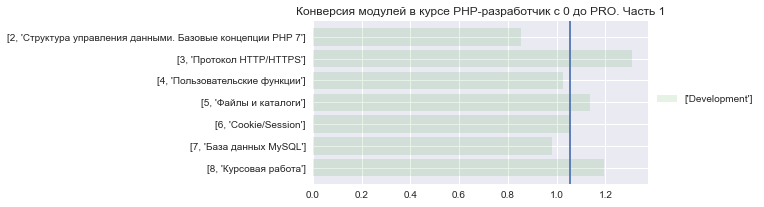

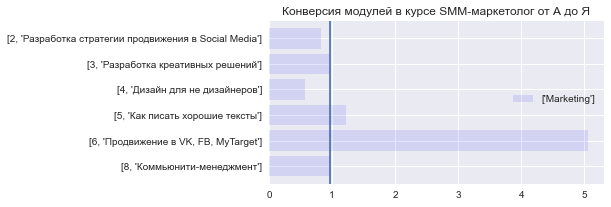

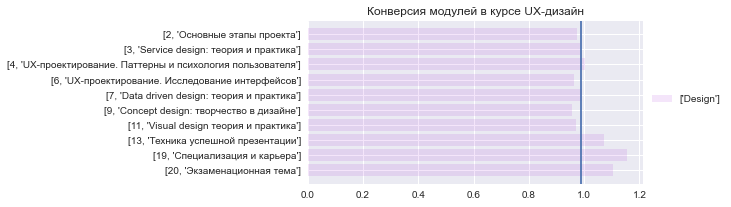

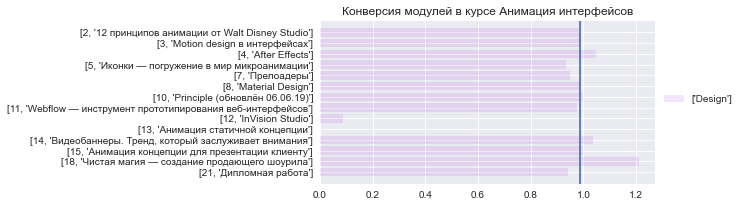

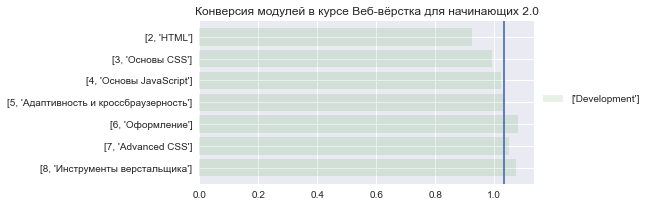

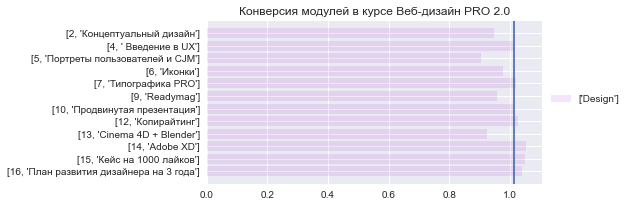

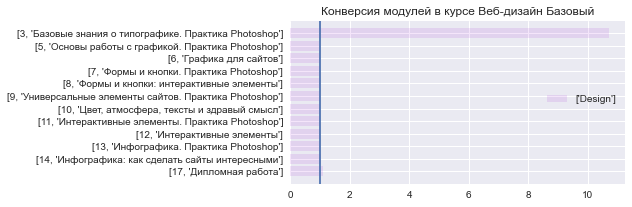

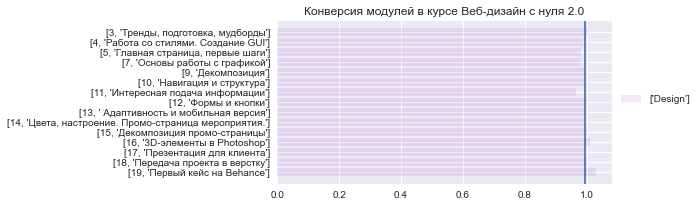

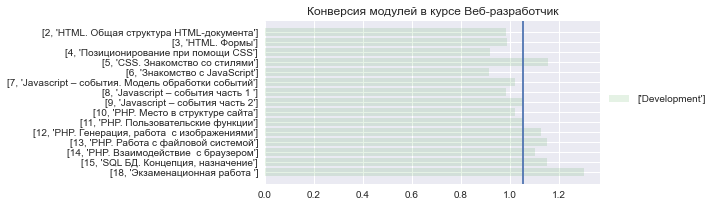

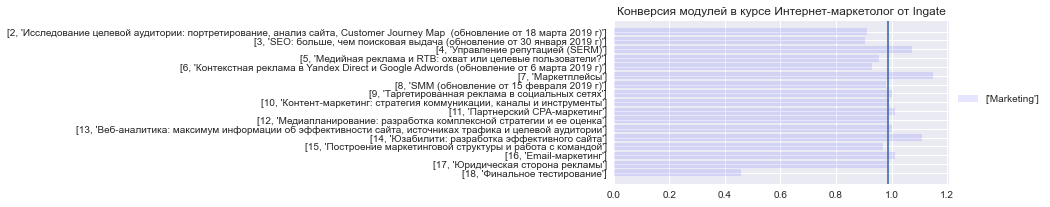

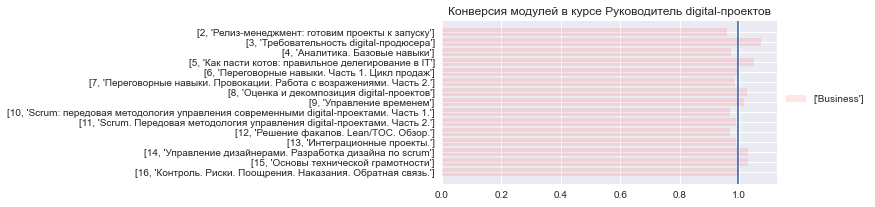

In [26]:
# plot 15 graphs
for title in list(main_4_1.title.unique()):
    data = main_4_1.sort_values(by=['title','module_number'], ascending = False)[main_4_1['title']==title]
    fig, ax = plt.subplots(figsize=(6,3))
    color = main_4_1[main_4_1['title'] ==title]['color'].unique()
    field = main_4_1[main_4_1['title'] ==title]['field'].unique()
    ax.barh(data['y_mod_name'], data['converse'], alpha=0.1, label = field, color=color)
    ax.set_title('Конверсия модулей в курсе {}'.format(title))
    ax.axvline(x=main_4_1[main_4_1['title']==title]['converse'].median())
    ax.legend(bbox_to_anchor=(1, 0.6))



4.4
The first thing that strikes the eye when analysing the graphs is the large number of omissions in the data in the design courses. This is not the case in the other courses. This is probably due to the large number of incomplete DLs (due to the division by zero of completed DLs) and indirectly confirms the problem identified when analysing the median time to complete DLs (see conclusion 3.5). However, on closer examination (looking at completed and started DLs) it appears that the data is missing. 

The second observation is that the "Java Developer from scratch" course has the lowest conversion rate. While the other courses have a conversion rate close to 1, "Java Developer from scratch" has a median conversion rate of 0.76.

It can also be noted that conversion tends to increase on average towards the end of all courses (last modules).

## 5. Performance metric 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*(optional assignment)*(optional assignment)*.

Sometimes students take courses that prove to be beyond their capacity. This may be either due to reasons of insufficient initial preparation or due to low motivation of the student. To improve content quality, it is helpful to identify the cause. Based on the available data, come up with a metric for the student's performance. **Rationalise it.** Identify such students in each course to provide producers with a list of problem students. 

*Given that students do not receive grades for completed assignments, the only indicators of progress can be: students who have not completed assignments (fail status), and time to complete assignments/module completion.
Let's try to find students who have not completed the assignments*

In [42]:
### YOUR CODE HERE ###
# the ratio of students who completed and started CPs for each module - to see what percentage of students did not complete CPs. Similarly for each course 
main_5_s = main[(main['is_homework']==True) & (main['status'] !='done') & (main['status'] !='fail')].sort_values(['title', 'module_number'])
main_5_s = main_5_s.groupby(['title', 'module_number', 'student_id'], as_index=False)['progress_id'].agg(lambda x:x)
main_5_f = main[(main['is_homework']==True) & (main['status'] =='fail')]
main_5_f = main_5_f.groupby(['title', 'module_number', 'student_id'], as_index=False)['progress_id'].agg(lambda x:x)
main_5 = main_5_s.merge(main_5_f[['title', 'module_number', 'student_id']], on=['title', 'module_number', 'student_id'], how='inner')

main_5.groupby(['student_id'])['module_number', 'title'].agg(lambda x:x)

<ipython-input-42-5c52ffa832d3>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_5.groupby(['student_id'])['module_number', 'title'].agg(lambda x:x)


,module_number,title
student_id,,
0ba029d1ed51f944546d4b7f8f5447aa,4,Java-разработчик c нуля
0ba5e61ea012b0eddc9f88df22b4fcad,5,Java-разработчик c нуля
10d60d5bd2510fedc5d64b30cfdd3b9c,5,Java-разработчик c нуля
1ac58b48ed96e5e8620cbcf821f7c9ca,8,Java-разработчик c нуля
1d0777c4f014379fef5c72c4a583f237,6,Java-разработчик c нуля
3c65f72fc4a9528b119e2af3caa255c4,9,Java-разработчик c нуля
44f421c10cb220d877d2c3dcfa5457f6,4,Веб-дизайн PRO 2.0
551274f4f9f0dc62a0b89bdbf6e07870,5,Java-разработчик c нуля
7244edba156d037b35bf477200cc8144,5,Java-разработчик c нуля


*There were twenty students who did not complete the assignments. Each of them did not complete the assignment only once in one module, so we cannot say that the course or module did not "work" for them, because there is only one observation for each student. 
Let's try to find students who take too long to complete modules compared to others.*

In [100]:
# take the DF from the third assignment with the duration of each module and select the top 3 students who took the longest to complete the module)
main_5_hwl = main_3_1j.sort_values(by=['title', 'module_number', 'days_spent'], ascending=False)
main_5_hwl.groupby(['title', 'module_number'])['student_id', 'days_spent'].apply(lambda x: x.nlargest(3, 'days_spent')).reset_index()
# find students who are systematically among the anti-leaders in terms of module completion times
main_5_hwl.groupby(['title','student_id'])['module_number'].count().sort_values(ascending=False)

<ipython-input-100-547dc69fafce>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  main_5_hwl.groupby(['title', 'module_number'])['student_id', 'days_spent'].apply(lambda x: x.nlargest(3, 'days_spent')).reset_index()


title                          student_id                      
Интернет-маркетолог от Ingate  651b27f3a027bc0028df4fbd117d1524    18
                               f15d37b4cc4223187d643dbab0f7bb11    18
                               4e97bda62fb0b208c9a49d272866020d    18
                               b1c05fcc8769f80968958e22197a4dfa    18
                               0a3aeea977a4501655eb6e3a526ad381    18
                                                                   ..
UX-дизайн                      56e39d635870826b2bf7774e163f3802     1
                               568869640e11edb63c11edf6be4666ae     1
Интернет-маркетолог от Ingate  5d72a47b43a43c055b801335c83d670d     1
UX-дизайн                      5338d5a2b6089a8482753b71a5ee2b34     1
Excel Базовый                  001b192f899a84496be98b41906246fc     1
Name: module_number, Length: 9004, dtype: int64

In [102]:
# When you consider that the number of modules varies from 8 to 21, there are students who have taken modules for too long even in more than one or two courses
main_5_hwl.groupby(['student_id'])['module_number'].count().sort_values(ascending=False).head(20)

student_id
40217d80fbfb852beb0b6a896c86ad38    54
84f56692cdb41e40cfa41c6345f439c2    52
b82b8296bba4fb55a82f8ad95faf815b    50
f637b158d5720f6e50da87ac620a9c82    48
20656833a49c0d951f49a42280f6ee0f    48
1310fa586646c93fe5ecdd6e578ea2c9    48
38cfde7ce7f464b328a8240c4c8b46cd    47
f1ee750ba369f122982ef490869a1617    47
bda333fed381faada5c2745f3a583c47    44
cc7186542f9d3ea846a3e993b2461177    44
9bcaa1e03111b10cdd29ebef194fc4f2    43
a83efc46b6bc6e718e147a4f3dc526ee    42
3cd0c5bfc9d001950e79f88be5f8d571    42
8a1dd13368ac23f07d4fe56e6222a8b4    41
4e630a4877741fd57f4588ddef3d55ec    41
f8ebc4b57a8b9b26a1a2d870d70fe28e    40
c7623c47650fb1ade9268e2d3835655c    40
ce87ff48d886feb4127db3609e7a3eaa    39
fb355d872542b4c8011857715f387a40    39
23cf9e5846d496897886f451a4ad0a35    38
Name: module_number, dtype: int64